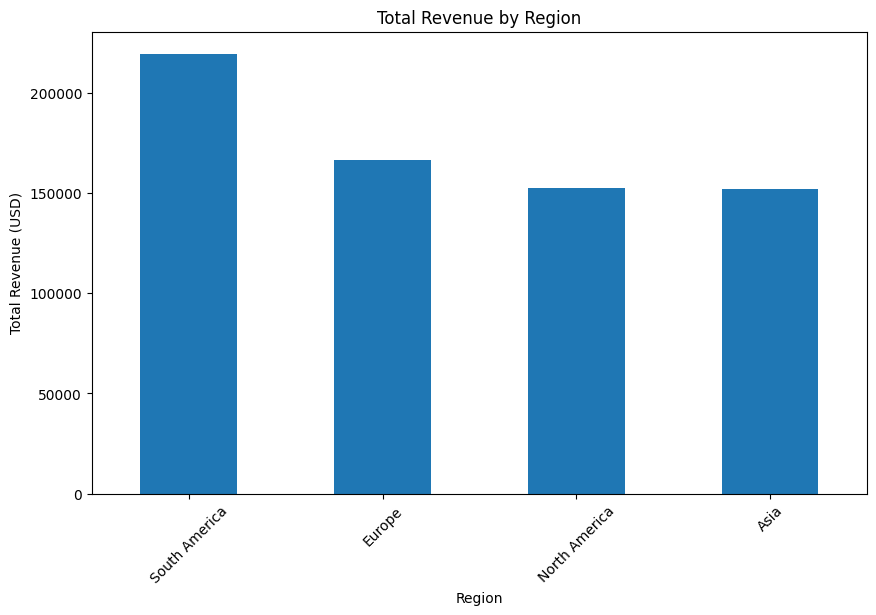


Product Category Performance:
             TransactionID  TotalValue  Quantity
Category                                        
Books                  270   192147.47       681
Electronics            254   180783.50       627
Clothing               228   166170.66       590
Home Decor             248   150893.93       639


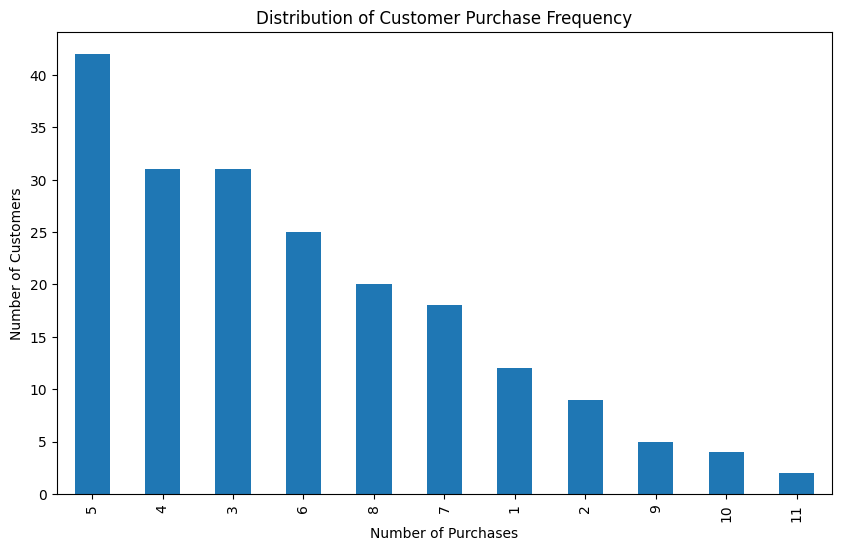

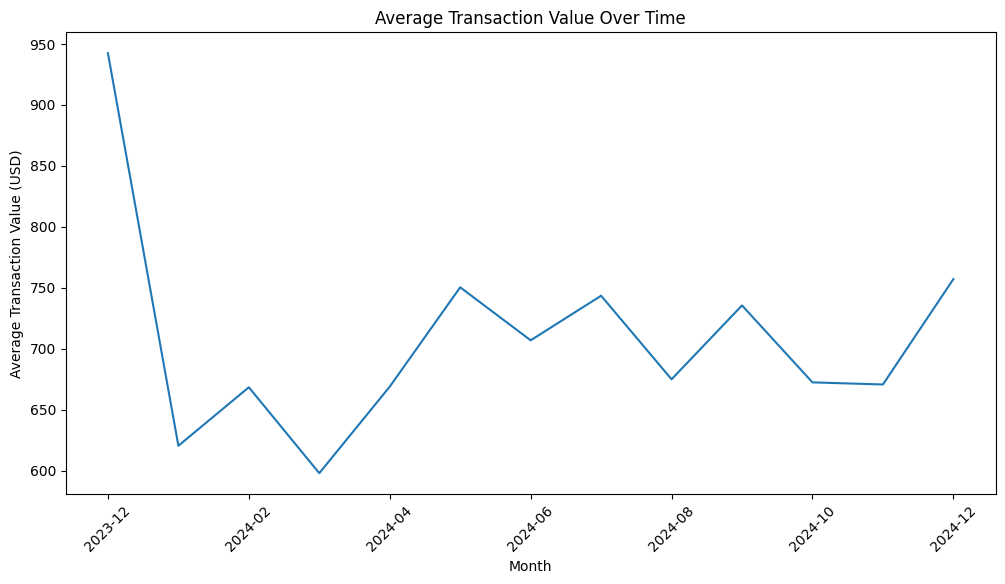


Price Sensitivity Analysis:
            Number_of_Transactions  Quantity
PriceRange                                  
Low                            255       645
Medium                         249       646
High                           251       627
Premium                        245       619


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

customer_transactions = pd.merge(transactions_df, customers_df, on='CustomerID')
region_revenue = customer_transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

product_transactions = pd.merge(transactions_df, products_df, on='ProductID')
category_metrics = product_transactions.groupby('Category').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).sort_values('TotalValue', ascending=False)

print("\nProduct Category Performance:")
print(category_metrics)

customer_frequency = transactions_df.groupby('CustomerID').size().value_counts()
plt.figure(figsize=(10, 6))
customer_frequency.plot(kind='bar')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['Month'] = transactions_df['TransactionDate'].dt.strftime('%Y-%m')
monthly_avg = transactions_df.groupby('Month')['TotalValue'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='line')
plt.title('Average Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

transactions_df['PriceRange'] = pd.qcut(transactions_df['Price'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
price_sensitivity = transactions_df.groupby('PriceRange').agg({
    'TransactionID': 'count',
    'Quantity': 'sum'
}).rename(columns={'TransactionID': 'Number_of_Transactions'})

print("\nPrice Sensitivity Analysis:")
print(price_sensitivity)